# COMP3314 Assignment2-Q3: Dimension Reduction (30 Points）

### Step 1: Download dataset
Load the MNIST dataset and split it into a training set and a test set (take the first 60,000 instances for training, and the remaining 10,000 for testing). In this experiment, we'll only be using the test set.

In [68]:
import tensorflow as tf
import numpy as np
import matplotlib
import matplotlib.pyplot as plot

(xs_train, ys_train), (xs_test, ys_test) = tf.keras.datasets.mnist.load_data()

# We'll only be using the test set.
print(xs_test.shape)
xs = xs_test.reshape((xs_test.shape[0], -1))
# xs = xs_test
ys = ys_test

print(f"xs shape: {xs.shape}")
print(f"ys shape: {ys.shape}")

(10000, 28, 28)
xs shape: (10000, 784)
ys shape: (10000,)


### Step 2: Visualize digits (2 Points)

Each hand-written MNIST digit is a 28x28 matrix. For each digit (0, 1, 2, ..., 9), pick one sample to visualize.

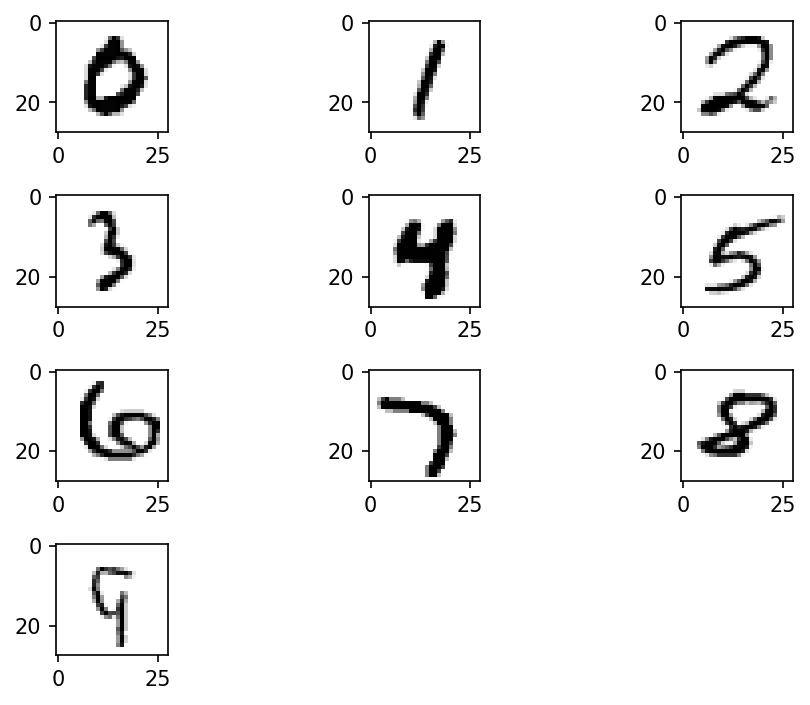

In [72]:
# Your code here.
def show_digits(xs):
    # global xs_test
    global ys
    matplotlib.rcParams["figure.dpi"] = 150
    i = 0
    for j, image in enumerate(xs.reshape((-1, 28, 28))):
        if ys[j]==i:
            plot.subplot(4, 3, i+1)
            plot.imshow(image, cmap=plot.get_cmap('gray_r'))
            i += 1
        if i > 9:
            break
    plot.tight_layout()
    plot.show()

show_digits(xs)

### Step 3: PCA projection and recovery (8 Points)

The original dataset has 28x28=784 feature dimensions.

1. Use PCA to reduce the feature dimensions to [400, 200, 100, 50], respectively.
2. From the reduced dimension data, reproject the data back to 784 dimensions. Plot the results of the reprojected digits. For each PCA dimension, you should plot digits from 0-9, similar to step 2.

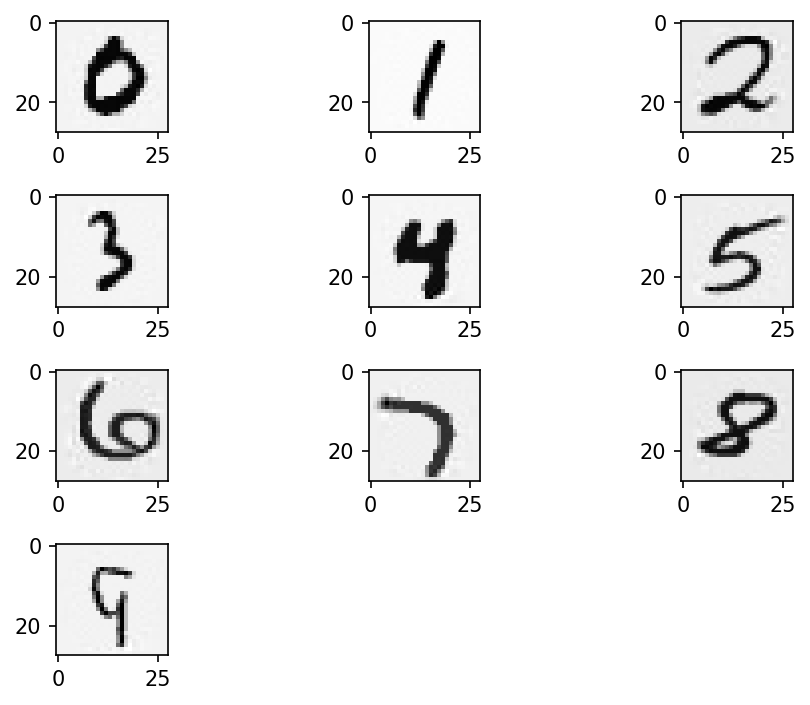

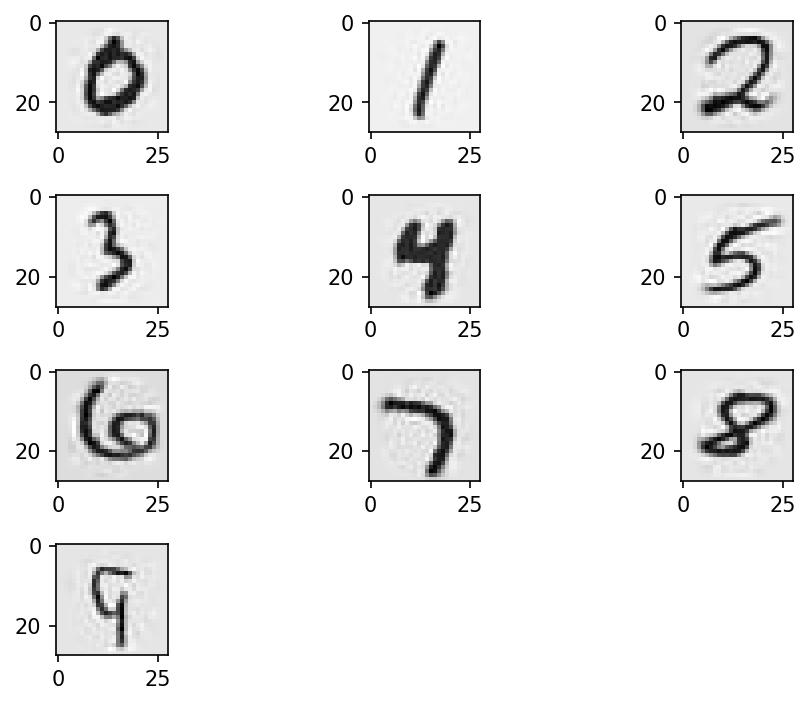

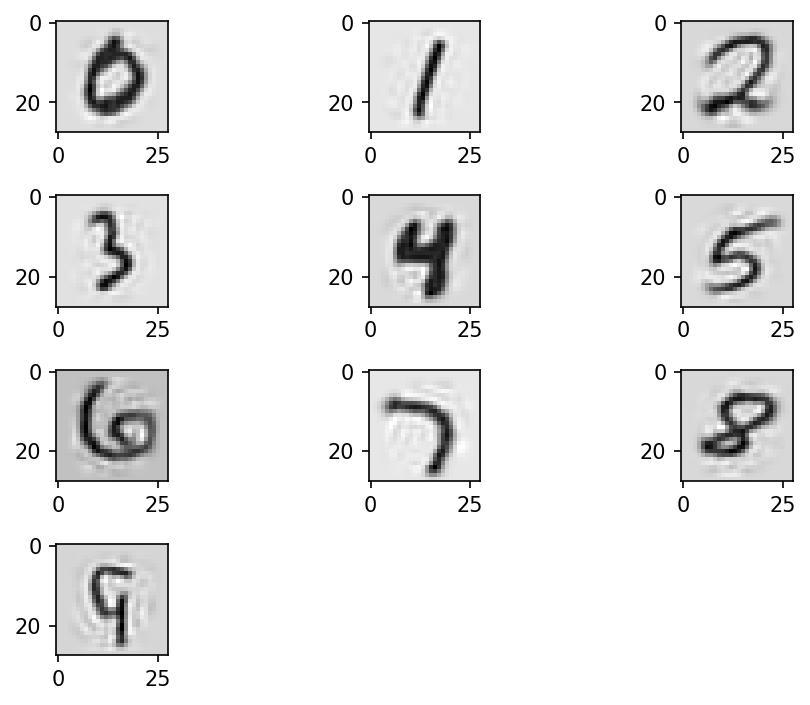

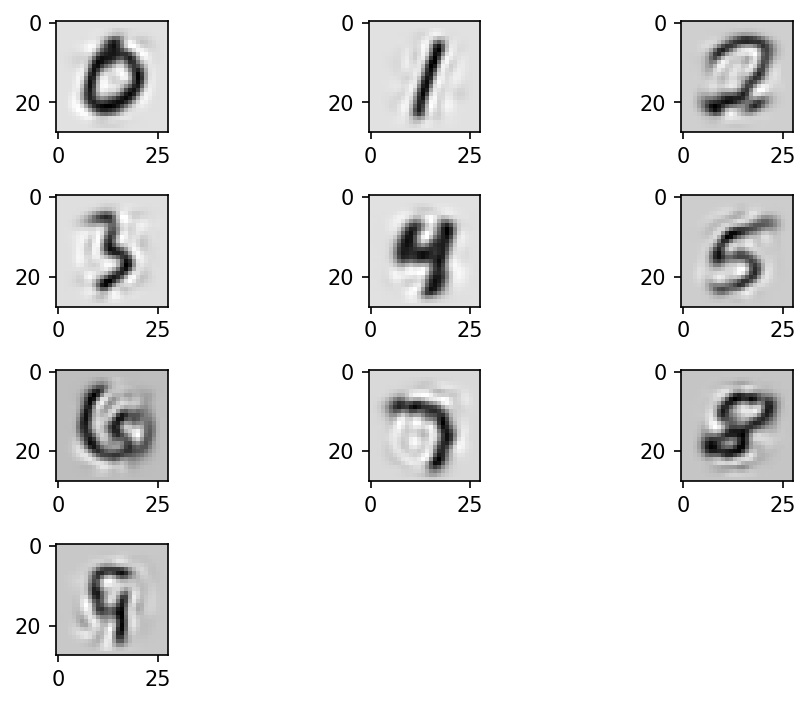

In [78]:
from sklearn.decomposition import PCA

# Your code here.
for dimensions in [400, 200, 100, 50]:
    pca = PCA(n_components=dimensions)
    pca.fit(xs)
    show_digits(pca.inverse_transform(pca.transform(xs)))

### Step 4: PCA Evaluation (4 Points) 

Now you have projected the data to 2 dimension using PCA. Let's discuss how to evaluate the performance of this PCA results.

Your tasks:

1. Propose a suitable metric (e.g., a scalar score) to evaluate the PCA performance.(2 Points)
2. Use the metric you proposed to evaluate the PCA results with different `n_components` (400, 200, 100, 50). (2 Points)

The score will be the accuracy of using the same classifier to identify the output of the PCA with different n_components. The higher the better.

In [84]:
from sklearn.neighbors import KNeighborsClassifier
# Your code here.
def get_accuracy(ys, ys_pred):
    assert ys.shape == ys_pred.shape
    assert ys.ndim == 1
    return np.sum(ys == ys_pred) / len(ys)

knn = KNeighborsClassifier(10)

xs_train_reshaped = xs_train.reshape((xs_train.shape[0], -1))
for dimensions in [400, 200, 100, 50]:
    pca = PCA(n_components=dimensions)
    pca.fit(xs_train_reshaped)
    xs_train_transformed = pca.transform(xs_train_reshaped)
    knn.fit(xs_train_transformed, ys_train)

    pca.fit(xs)
    xs_transformed = pca.transform(xs)
    print(get_accuracy(ys, knn.predict(xs_transformed)))

0.1375
0.1352
0.1348
0.1341


As can be seen number of dimensions has a positive relationship with score

### Step 5: t-SNE visualization (8 Points)

Use t-SNE to reduce the MNIST dataset down to 2 dimensions and plot the result using Matplotlib. You should clearly see clusters of the digits from the visualization.

<Axes: xlabel='x', ylabel='y'>

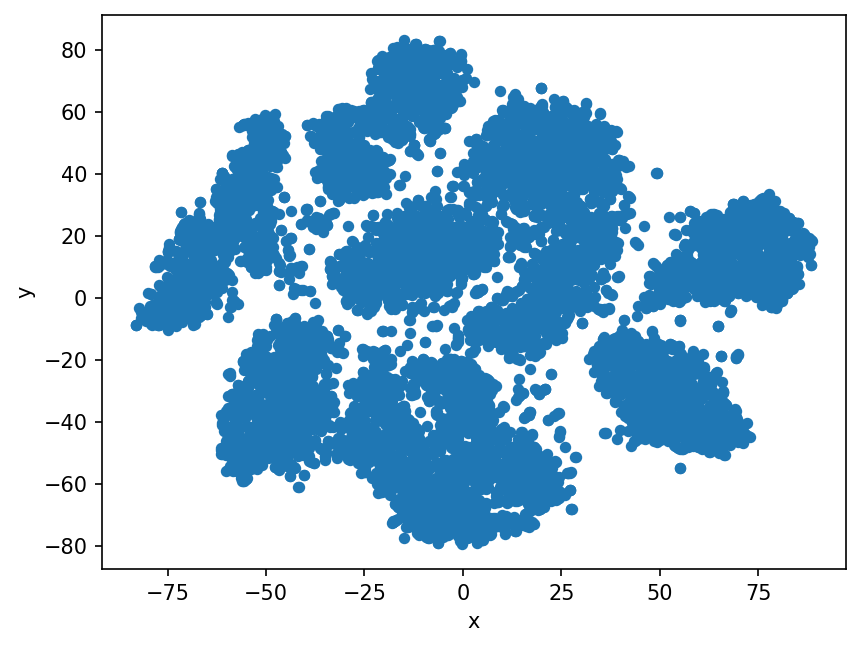

In [90]:
import pandas
from sklearn.manifold import TSNE


# Your code here.
# pca = PCA(n_components=dimensions)
tsne = TSNE(n_components=2)
pca_results = tsne.fit_transform(xs)
dataFrame = pandas.DataFrame({
    'x': pca_results[:,0],
    'y': pca_results[:,1]
})
dataFrame.plot(x='x', y='y', kind='scatter')

### Step 6: PCA visualization (8 Points)

Next, let's use PCA to project the data to 2 dimension. Visualize the 2D data again. Which one performs better, t-SNE or PCA?

<Axes: xlabel='x', ylabel='y'>

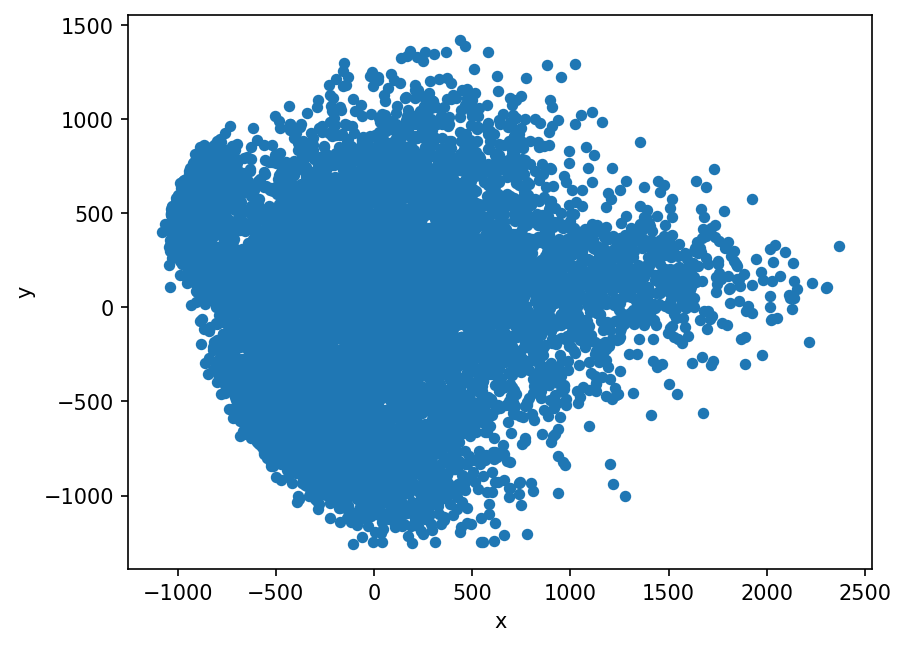

In [91]:
# Your code here.
pca = PCA(n_components=2)
pca_results = pca.fit_transform(xs)
dataFrame = pandas.DataFrame({
    'x': pca_results[:,0],
    'y': pca_results[:,1]
})
dataFrame.plot(x='x', y='y', kind='scatter')

t-SNE clearly performs better. There is distinct separation between clusters of digits while the all the digits are mixed together with PCA